In [32]:
import warnings
warnings.filterwarnings('ignore')

In [70]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
from collections import Counter

In [78]:
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import confusion_matrix
from imblearn.metrics import classification_report_imbalanced
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


In [79]:
#Standard columns for all datasets
columns = [
    "Fishing", "TugTow", "Recreational", "Passenger" , "Cargo", "Tanker", "Other", "Unavailable", "Total"
]

target_fishing = "Fishing"
target_tugtow = "TugTow"
target_rec = "Recreational"
target_passenger = "Passenger"
target_cargo = "Cargo"
target_tanker = "Tanker"
target_other = "Other"
target_unavailable = "Unavailable"
target_total = "Total"

In [164]:
#this will take in the clean data from the SQLite database
#set up engine will take place here first. 

file_path = Path('ml_data.csv')
df = pd.read_csv(file_path, index_col=False)


# Drop the null rows
df = df.dropna()
df.sort_values(by="Unnamed: 0")
df['Total'] = df.sum(axis=1)

df.head(15)

,Unnamed: 0,Fishing,TugTow,Recreational,Passenger,Cargo,Tanker,Other,Unavailable,Total
0,100,11,42,291,40,44,10,27,7,572
1,101,12,41,285,37,42,10,26,9,563
2,102,12,45,212,41,51,10,29,5,507
3,103,9,45,197,40,52,12,26,4,488
4,104,14,39,212,40,52,12,29,9,511
5,105,16,43,220,42,50,12,23,12,523
6,106,16,39,244,47,44,15,24,6,541
7,107,13,42,300,42,54,12,25,7,602
8,108,11,40,292,34,56,14,23,6,584
9,109,12,48,216,50,52,14,30,4,535


In [151]:
df.dtypes

Unnamed: 0      int64
Fishing         int64
TugTow          int64
Recreational    int64
Passenger       int64
Cargo           int64
Tanker          int64
Other           int64
Unavailable     int64
Total           int64
dtype: object

In [154]:
# Create our target for fishing model
y = df[target_fishing]
#print(y)
# Create our features
X =  df.drop(["Fishing","TugTow", "Recreational", "Passenger", "Cargo", "Tanker", "Other", "Unavailable", "Total"], axis=1)

In [155]:
X.describe()

,Unnamed: 0
count,365.000000
mean,183.000000
std,105.510663
min,1.000000
25%,92.000000
50%,183.000000
75%,274.000000
max,365.000000


In [156]:
#split into training data 
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    random_state=1)
X_train.shape
#print(X_test)

(273, 1)

In [157]:
classifier = LinearRegression()
classifier.fit(X_train, y_train)

LinearRegression()

In [158]:
y_pred = classifier.predict(X_test)
#print(y_pred)
#print(y_test)
fishing_results = pd.DataFrame({"Prediction": y_pred, "Actual": y_test}).reset_index(drop=True)
fishing_results.head(20)

,Prediction,Actual
0,13.995737,16
1,12.928570,13
2,13.030491,7
3,12.982528,9
4,14.211568,12
5,14.145620,10
6,12.538875,12
7,12.802669,14
8,14.019718,16
9,13.905807,16


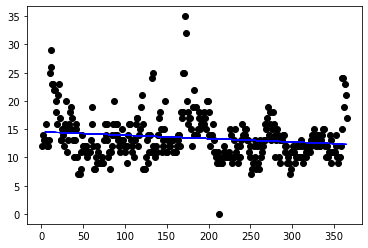

In [159]:
plt.scatter(X,y, color="black")
plt.plot(X_test, y_pred, color="blue", linewidth=1)


plt.show()